In [ ]:
#Samarth Borade
#C009
#BTI SEM 10
#EXP 8: Transfer Learning


In [5]:
# Step 1
from keras.applications import VGG16
import ssl

# Workaround to avoid SSL certificate verification error
ssl._create_default_https_context = ssl._create_unverified_context
# Load VGG16 model
vgg_model = VGG16()
vgg_model.summary()


553467096/553467096 [==============================] - 245s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                          

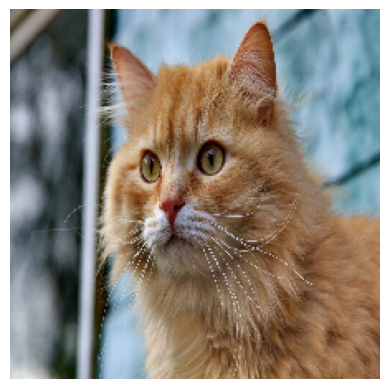

1/1 [==============================] - 0s 186ms/step
Predicted class: tiger_cat


In [36]:
# Step 2
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
# Load and preprocess image
img_path = 'cat1.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


# Show the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Predict class of the image
preds = vgg_model.predict(x)
predicted_class = decode_predictions(preds, top=1)[0][0]
print('Predicted class:', predicted_class[1])


In [ ]:

# Step 3
from keras.models import Model

# Customize VGG16 model for feature extraction
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer('fc2').output)

# Use model as feature extractor
features = feat_extractor.predict(x)

# Step 4
from keras.layers import Dense

# Add new layers to the model
x1 = feat_extractor.output  # Using the output of the feature extractor as input for new layers
x1 = Dense(128, activation='relu')(x1)
num_classes = 1000  # ImageNet has 1000 classes
predictions = Dense(num_classes, activation='softmax')(x1)

# Summarize the model
new_model = Model(inputs=feat_extractor.input, outputs=predictions)

# Step 5
# Define which layers are trainable
for layer in feat_extractor.layers:
    layer.trainable = False


In [37]:

# Predict class of the image using the updated model
new_preds = new_model.predict(x)
new_predicted_class = decode_predictions(new_preds, top=1)[0][0]
print('New Predicted class:', new_predicted_class[1])


1/1 [==============================] - 0s 158ms/step
New Predicted class: ski


In [25]:
# Save the summary to a text file
with open('vgg_model_summary.txt', 'w') as f:
    vgg_model.summary(print_fn=lambda x: f.write(x + '\n'))

with open('new_model_summary.txt', 'w') as f:
    new_model.summary(print_fn=lambda x: f.write(x + '\n'))
